## Problem: Build a regression model to predict the price of a flight using the flights.csv dataset

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset
df=pd.read_csv('/content/flights.csv')

In [ ]:
 # Dataset first view
df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### Dataset preparation

In [ ]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [ ]:
# No null values
df.isnull().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


In [ ]:
# Checking the data types
df.dtypes

,0
travelCode,int64
userCode,int64
from,object
to,object
flightType,object
price,float64
time,float64
distance,float64
agency,object
date,object


In [ ]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking if there are any outliers
df.describe()

,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


In [ ]:
# Checking skewness
df['price'].skew()


np.float64(0.3135775686612531)

A skewness of ~0.31 indicates near symmetry, so no transformation is required.

In [ ]:
# Checking Data consistency
df.nunique()

,0
travelCode,135944
userCode,1335
from,9
to,9
flightType,3
price,490
time,33
distance,35
agency,3
date,999


In [ ]:
# Type casting
df['price']=df['price'].astype(int)
df['date']=df['date'].astype('datetime64[ns]')

### Feature engineering

In [ ]:
# Droping the columns
df.drop(columns=['travelCode', 'userCode'], inplace=True)

In [ ]:
# Extract the day, month, and year from the date column
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop original
df.drop('date', axis=1, inplace=True)

In [ ]:
# Getting categorical variable
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['from', 'to', 'flightType', 'agency'], dtype='object')


In [ ]:
df.head()

,from,to,flightType,price,time,distance,agency,day,month,year
0,Recife (PE),Florianopolis (SC),firstClass,1434,1.76,676.53,FlyingDrops,26,9,2019
1,Florianopolis (SC),Recife (PE),firstClass,1292,1.76,676.53,FlyingDrops,30,9,2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487,1.66,637.56,CloudFy,3,10,2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127,1.66,637.56,CloudFy,4,10,2019
4,Aracaju (SE),Salvador (BH),firstClass,1684,2.16,830.86,CloudFy,10,10,2019


In [ ]:
# Target encoding for from, to and agency columns
from sklearn.preprocessing import TargetEncoder
encoder = TargetEncoder()
df['from'] = encoder.fit_transform(df[['from']], df['price'])
df['to'] = encoder.fit_transform(df[['to']], df['price'])
df['agency'] = encoder.fit_transform(df[['agency']], df['price'])

In [ ]:
# Saving Target encoder
import joblib
joblib.dump(encoder, 'target_encoder.pkl')

['target_encoder.pkl']

In [ ]:
# Ordinal Encoding flightType
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['flightType'] = encoder.fit_transform(df[['flightType']])

# saving encoder
joblib.dump(encoder, 'ordinal_encoder.pkl')


['ordinal_encoder.pkl']

In [134]:
df.tail()

,from,to,flightType,price,time,distance,agency,day,month,year
271883,0.000000,0.000000,1.0,1446,1.49,573.81,0.003535,12,7,2020
271884,0.000000,0.017464,0.0,726,1.84,709.37,0.003535,16,7,2020
271885,0.024274,0.000000,0.0,873,1.84,709.37,0.003535,20,7,2020
271886,0.000000,0.000000,0.0,313,1.21,466.30,0.003535,23,7,2020
271887,0.000000,0.000000,0.0,533,1.21,466.30,0.003535,26,7,2020


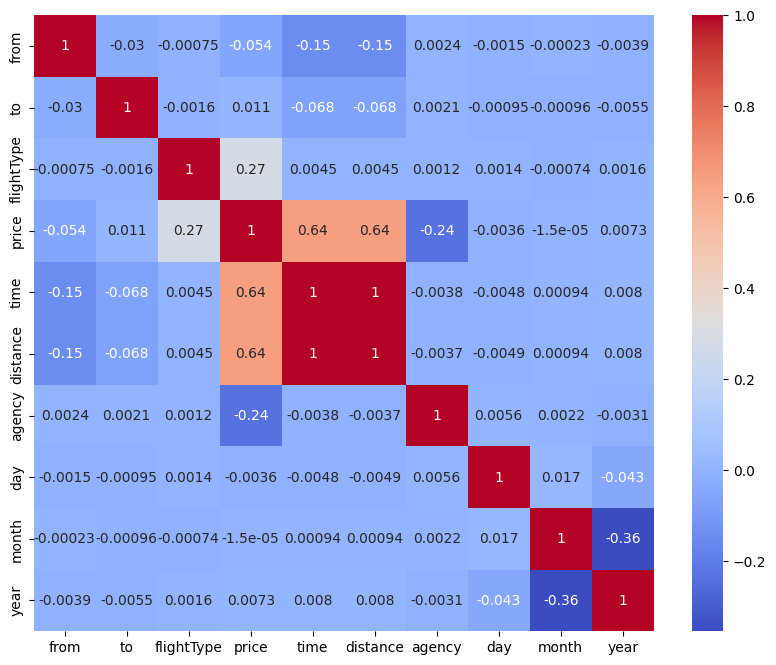

In [132]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [135]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']

### Model selections

In [156]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1 : Decision tree regressor


In [170]:
# Importing Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fitting
dt = DecisionTreeRegressor(
    criterion="squared_error",
    max_depth=10,
    min_samples_leaf=50,
    min_samples_split=100,
    max_features=5,
    random_state=42
)
dt.fit(X_train, y_train)

# Prediction
y_pred = dt.predict(X_test)
print(y_pred)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

[ 575.57996146 1186.66427379 1174.         ...  800.8344086   674.
 1654.82969432]
MSE: 16509.644038103397
R2: 0.874706669453354


Model 2 : Random Forest Regressor

In [178]:
# Importing model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fitting
rf = RandomForestRegressor(n_estimators=505,
    max_depth=13,
    min_samples_leaf=57,
    min_samples_split=134,
    max_features=5,
    bootstrap=True,
    n_jobs=-1,
    random_state=42)
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)
print(y_pred)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

[ 580.67563705 1135.65628755 1172.19129744 ...  801.08874919  671.08187418
 1653.9261499 ]
MSE: 15695.292578392053
R2: 0.8808868636711863


Model 3 : XGBoost Regressor

In [180]:
# Importing model
from xgboost import XGBRegressor

# Fitting model
xgb = XGBRegressor(n_estimators= 500,
                   learning_rate= 0.08,
                   max_depth= 5,
                   reg_alpha= 0.0007787658410143283,
                   reg_lambda= 3.47,
                   subsample= 0.88)
xgb.fit(X_train, y_train)

# Prediction
y_pred = xgb.predict(X_test)
print(y_pred)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

[ 568.80444 1139.4515  1167.9744  ...  794.67615  672.0101  1663.3066 ]
MSE: 15222.087890625
R2: 0.8844780325889587


In [185]:
# saving XGBoost regressor model
import joblib
joblib.dump(xgb, 'xgb_regressor.pkl')


['xgb_regressor.pkl']